# Urbanization level clustering

In [199]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
# sns.set_style("whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [200]:
from src.config import (MASTER_DF_FILE, CLUSTERING_CONFIG)
from src.models.clustering import ClusteringEngine
from src.features.dimentionality import UrbanizationAnalyzer
from src.data.loader import DataLoader

In [201]:


from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score


from sklearn.model_selection import train_test_split

In [204]:
df = DataLoader(MASTER_DF_FILE).load_dataset(features=CLUSTERING_CONFIG["urban"])
df2022 = DataLoader(MASTER_DF_FILE).get_data_for_year(year=2022, features=CLUSTERING_CONFIG["urban"])
df2023 = DataLoader(MASTER_DF_FILE).get_data_for_year(year=2023, features=CLUSTERING_CONFIG["urban"])

2025-12-13 17:57:32,011 - INFO - Successfully loaded dataset with 3961 rows.
2025-12-13 17:57:32,041 - INFO - Retrieved 932 rows for year 2022.
2025-12-13 17:57:32,070 - INFO - Retrieved 932 rows for year 2023.


## PCA

### Urbanization Clustering Analysis

We categorize regions into distinct **Urbanization Tiers** by clustering on three core dimensions: **Service Availability**, **Income**, and **Population Density**.

To visualize the structure of this high-dimensional feature space, we project the data onto its first two Principal Components:
* **PC1 (Infrastructure):** Driven primarily by service availability columns.
* **PC2 (Wealth & Density):** Heavily weighted by income levels and population density.

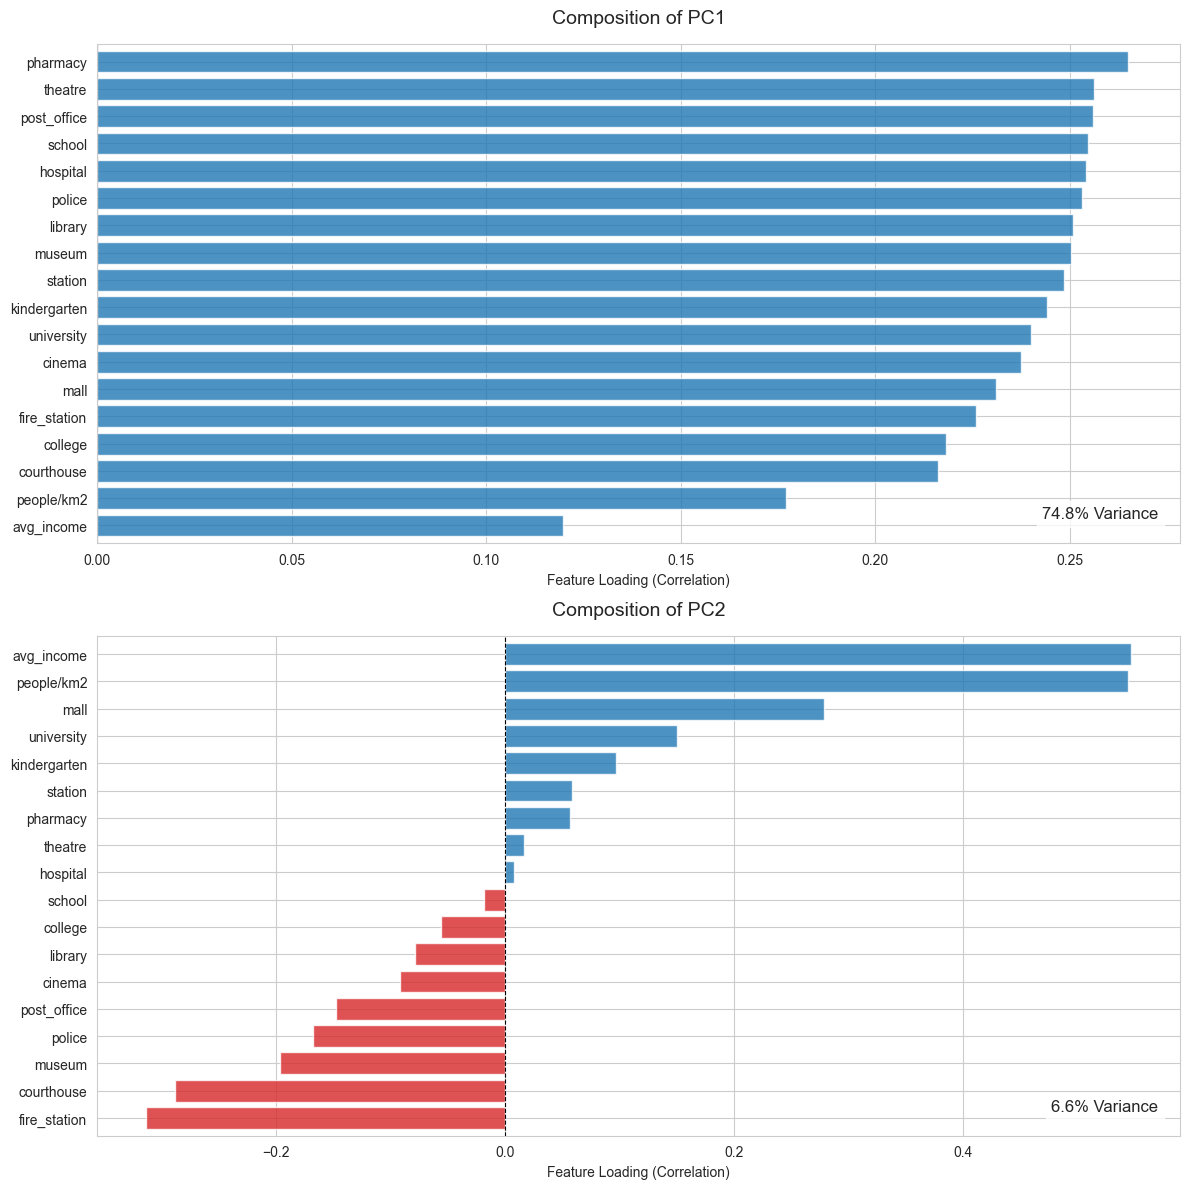

In [208]:
pca_engine = UrbanizationAnalyzer(n_components=2)
pca_df = pca_engine.run_pca(df)
pca_engine.plot_component_details().show()

2025-12-13 18:04:06,477 - INFO - Retrieved 932 rows for year 2020.
2025-12-13 18:04:06,530 - INFO - Retrieved 932 rows for year 2021.
2025-12-13 18:04:06,580 - INFO - Retrieved 932 rows for year 2022.
2025-12-13 18:04:06,630 - INFO - Retrieved 932 rows for year 2023.


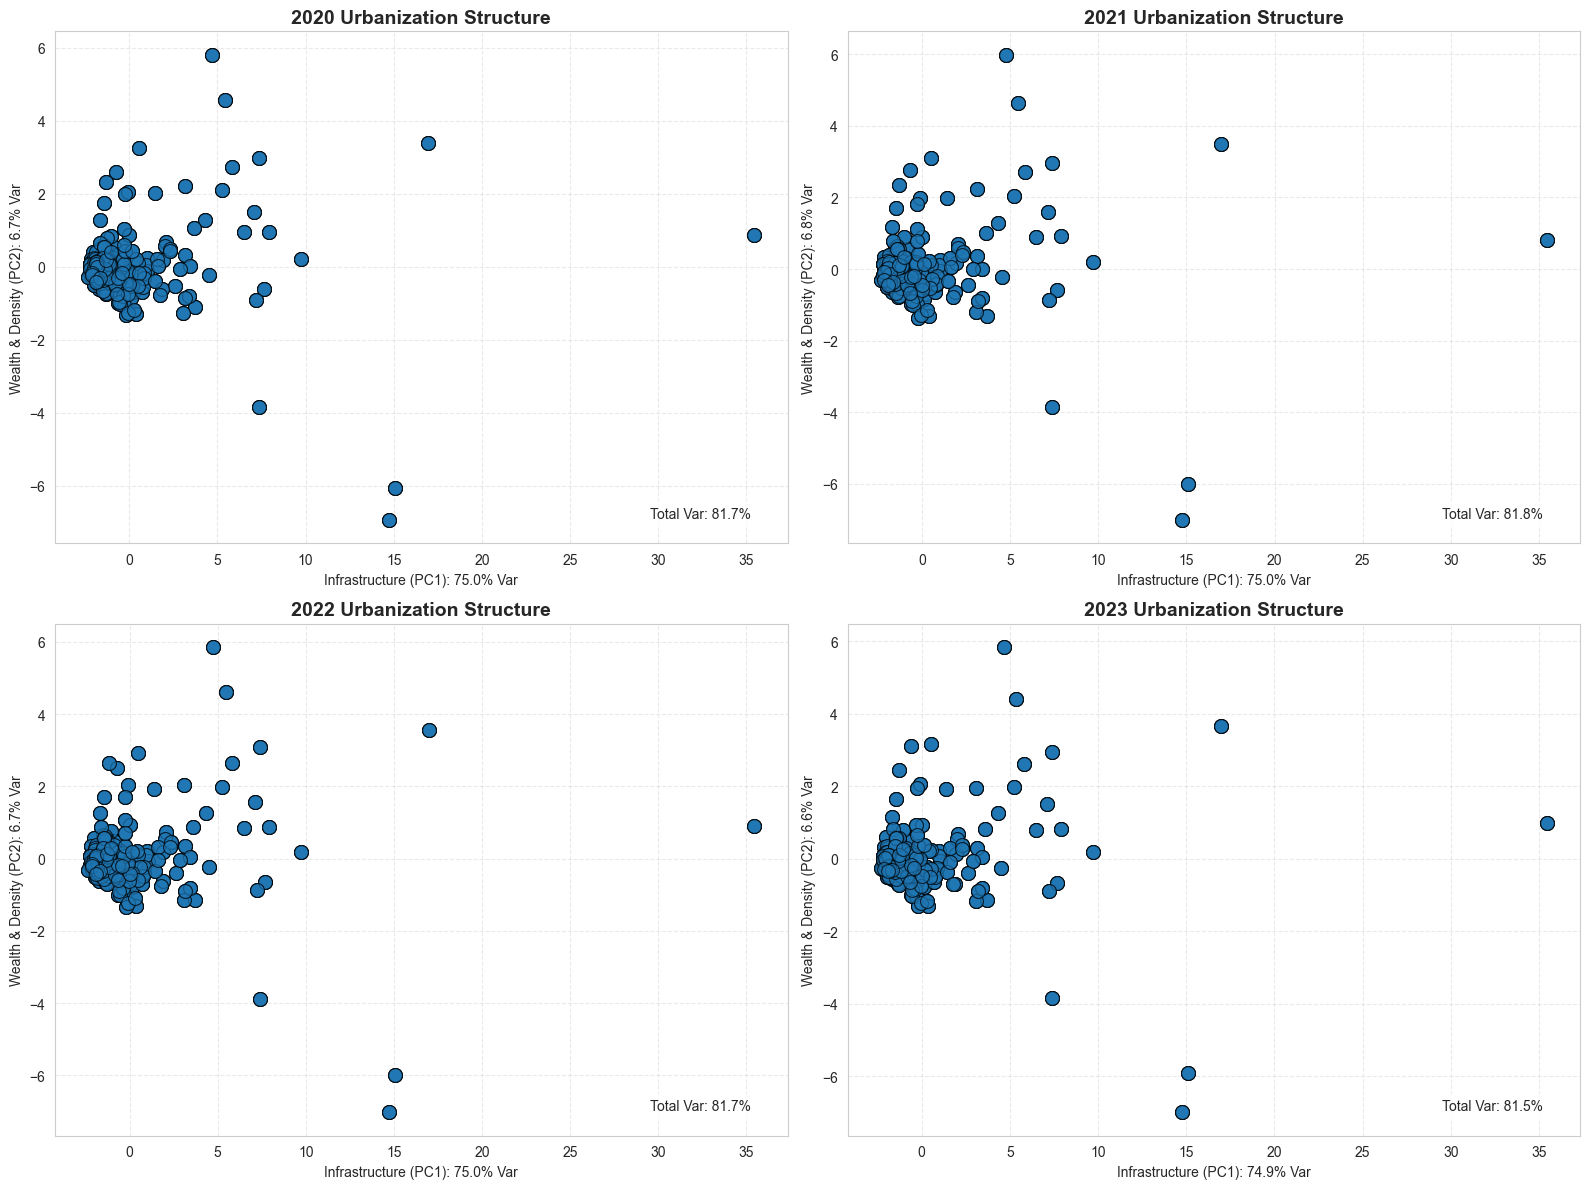

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import MASTER_DF_FILE, CLUSTERING_CONFIG

# Configuration
YEARS = [2020, 2021, 2022, 2023]
FEATURES = CLUSTERING_CONFIG["urban"]

# Initialize Loader
loader = DataLoader(MASTER_DF_FILE)

# Setup 2x2 Grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Flatten to make indexing (0, 1, 2, 3) easier

for i, year in enumerate(YEARS):
    ax = axes[i]
    
    try:
        # 1. Load Data for Specific Year
        # The loader filters by year and returns only the numeric features we need
        df_year = loader.get_data_for_year(year, features=FEATURES)
        
        if df_year.empty:
            ax.text(0.5, 0.5, f"No Data for {year}", ha='center', fontsize=14)
            continue

        # 2. Run PCA
        analyzer = UrbanizationAnalyzer(n_components=2)
        pca_df = analyzer.run_pca(df_year)
        stats = analyzer.get_variance_stats()
        
        # 3. Plot on the specific subplot axis
        sns.scatterplot(
            x='PC1', 
            y='PC2', 
            data=pca_df, 
            ax=ax, 
            s=100, 
            alpha=0.7, 
            edgecolor='k',
            legend=False
        )
        
        # 4. Customizing the Subplot
        ax.set_title(f"{year} Urbanization Structure", fontsize=14, weight='bold')
        ax.set_xlabel(f"Infrastructure (PC1): {stats['pc1_var']:.1f}% Var")
        ax.set_ylabel(f"Wealth & Density (PC2): {stats['pc2_var']:.1f}% Var")
        ax.grid(True, linestyle="--", alpha=0.4)
        
        # Add total variance annotation
        ax.text(0.95, 0.05, f"Total Var: {stats['total_var']:.1f}%", 
                transform=ax.transAxes, ha='right', fontsize=10, 
                bbox=dict(facecolor='white', alpha=0.8))

    except Exception as e:
        ax.text(0.5, 0.5, f"Error: {str(e)}", ha='center', color='red')

plt.tight_layout()
plt.show()

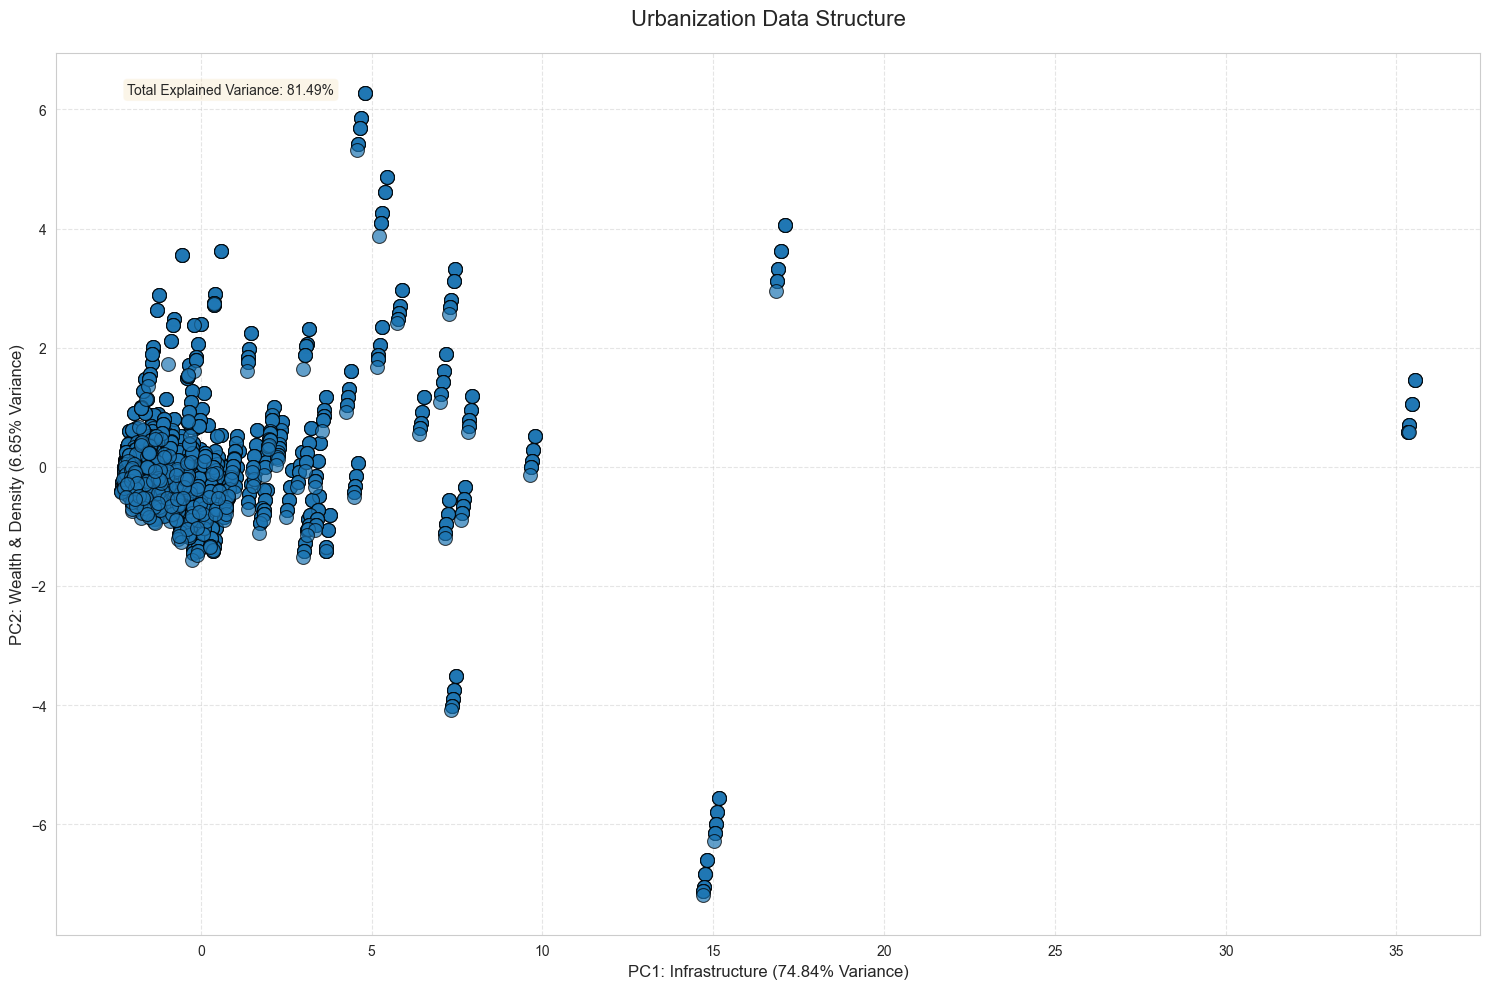

In [209]:
fig = pca_engine.plot_projection()
fig.show()

## CHOICE OF THE CLUSTERING ALGORITHM

In [ ]:
# 3. INITIALIZE CLUSTERING ENGINE
engine = ClusteringEngine(seed=SEED)
engine.preprocess(df[FEATURES])

# 4. STEP 1: SENSITIVITY ANALYSIS (ELBOW METHOD)
# We check 2 to 10 clusters to find the sweet spot
fig_tune, metrics = engine.run_kmeans_tuning(max_k=10)
plt.show()

# 5. STEP 2: ALGORITHM COMPARISON
# Visually compare how K-Means, GMM, and DBSCAN handle this data
fig_compare = engine.compare_algorithms(pca_data=pca_coords)
plt.show()

# 6. STEP 3: FINAL MODEL TRAINING
# Based on the elbow plot, let's say we chose n=3
# (The original code chose 6, but for this mock data 3 is safer)
engine.train_final_model(n_clusters=3)

# 7. STEP 4: PROFILING
# Understand what the clusters actually represent
profiles = engine.get_cluster_profiles(df, FEATURES)
print("\nCluster Profiles (Feature Means):")
print(profiles)

# 8. VISUALIZE FINAL TIERS
# Using the PCA projection to show the final clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_coords[:, 0], pca_coords[:, 1], c=engine.labels, cmap='viridis', s=100, alpha=0.7)
plt.title("Final Urbanization Tiers")
plt.xlabel("PC1: Infrastructure")
plt.ylabel("PC2: Wealth")
plt.colorbar(label="Cluster ID")
plt.grid(True, alpha=0.3)
plt.show()

NameError: name 'SEED' is not defined